In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [5]:
data = pd.read_csv('D:/sem2/ALDA/Project/archive/creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data Preprocessing

0    284315
1       492
Name: Class, dtype: int64

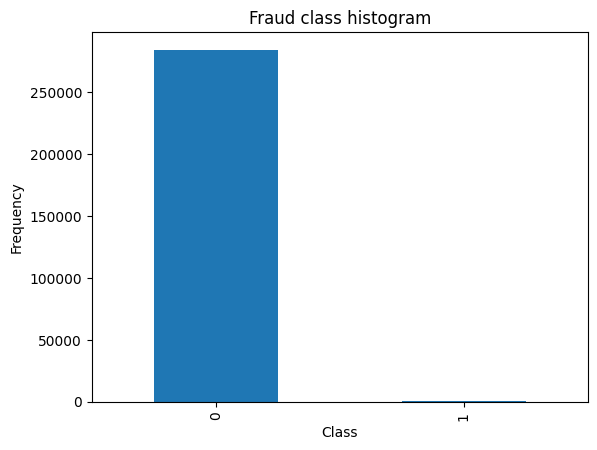

In [6]:
pd.value_counts(data['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
data['Class'].value_counts()

In [7]:
data['normAmount'] = StandardScaler().fit_transform(data[['Amount']])
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807, 1)


SMOTE APPLICATION for data balancing

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


In [12]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


Text(0, 0.5, 'Frequency')

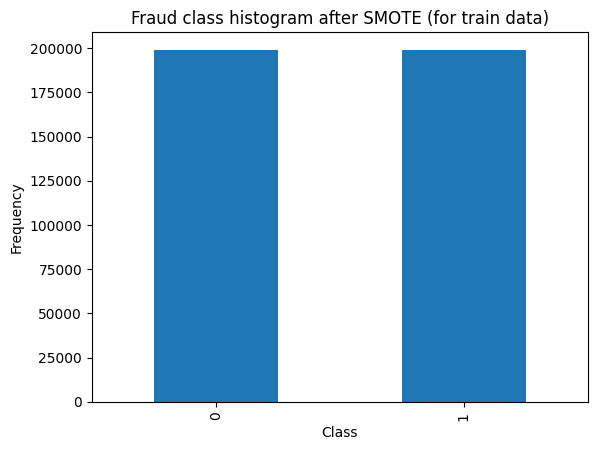

In [13]:
pd.value_counts(y_train_res).plot.bar()
plt.title('Fraud class histogram after SMOTE (for train data)')
plt.xlabel('Class')
plt.ylabel('Frequency')

ADASYN Application for data balancing

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

In [15]:
ada = ADASYN(random_state=2)
X_train_ad_res, Y_train_ad_res = ada.fit_resample(X_train, y_train.ravel())

In [16]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)
Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 



In [17]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_ad_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_ad_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_ad_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_ad_res==0)))

After OverSampling, the shape of train_X: (398029, 29)
After OverSampling, the shape of train_y: (398029,) 

After OverSampling, counts of label '1': 199010
After OverSampling, counts of label '0': 199019


Text(0, 0.5, 'Frequency')

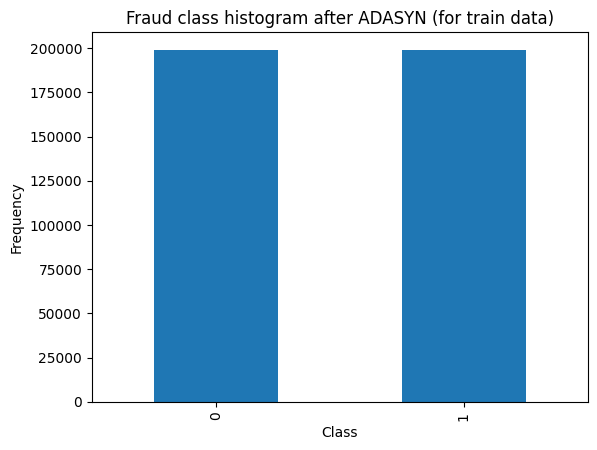

In [18]:
pd.value_counts(Y_train_ad_res).plot.bar()
plt.title('Fraud class histogram after ADASYN (for train data)')
plt.xlabel('Class')
plt.ylabel('Frequency')

*TRAINING*

1. Logistic Regression:

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

1.a) Training with smote datas

In [20]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [21]:
clf.best_params_

{'C': 9.0}

In [22]:
lr1 = LogisticRegression(C=9,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


LogisticRegression(C=9, verbose=5)

1.b)Training with ADASYN datas

In [23]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_ad_res, Y_train_ad_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [24]:
clf.best_params_

{'C': 1.0}

In [25]:
lr2 = LogisticRegression(C=9,penalty='l2', verbose=5)
lr2.fit(X_train_ad_res, Y_train_ad_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


LogisticRegression(C=9, verbose=5)

1.c)Training without sampling datas

In [48]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [49]:
clf.best_params_

{'C': 4.0}

In [50]:
lr3 = LogisticRegression(C=4,penalty='l2', verbose=5)
lr3.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(C=4, verbose=5)

2. Decision Trees

2.a) Training with smote datas

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_model = DecisionTreeClassifier()


In [27]:
decision_model_smote = decision_model.fit(X_train_res, y_train_res.ravel())

#Predict the response for test dataset
y_pred_smote_dt = decision_model_smote.predict(X_test)

In [28]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_smote_dt))

Accuracy: 0.9976007396744028


2.b) Training with ADASYN datas

In [29]:
decision_model_adasyn = decision_model.fit(X_train_ad_res, Y_train_ad_res.ravel())
y_pred_adasyn_dt = decision_model_adasyn.predict(X_test)

In [30]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adasyn_dt))

Accuracy: 0.9977879990168884


2.c) Training with ADASYN datas

In [55]:
decision_model_unsampled = decision_model.fit(X_train, y_train.ravel())
y_pred_unsample_dt = decision_model_unsampled.predict(X_test)

In [56]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_unsample_dt))

Accuracy: 0.9992743700478681


*Testing + Confusion Matrix*

In [31]:
import itertools
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

Confusion matrix for smote trained data: (logistic regression)

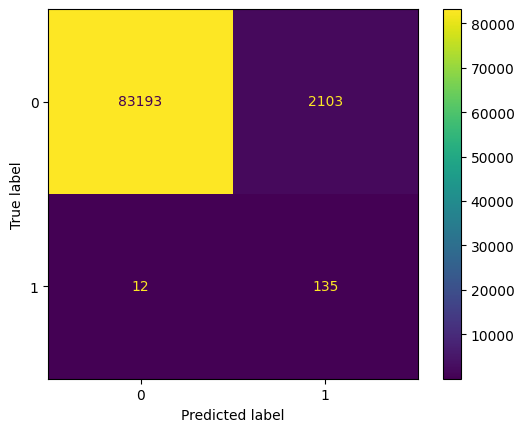

In [32]:
ConfusionMatrixDisplay.from_estimator(lr1, X_test, y_test)

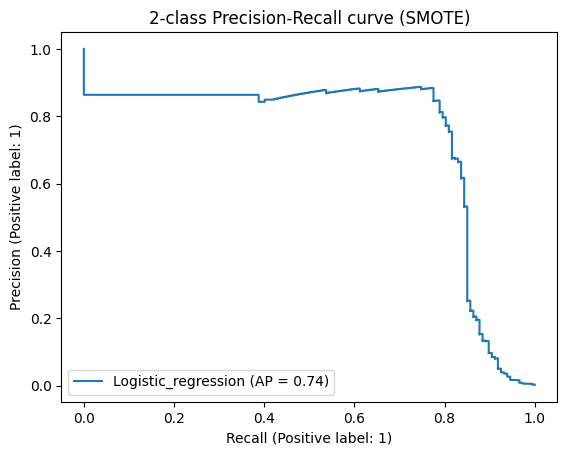

In [33]:
display = PrecisionRecallDisplay.from_estimator(
    lr1, X_test, y_test, name="Logistic_regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (SMOTE)")

In [34]:
from sklearn.metrics import f1_score

F1 Score

In [35]:
y_pred = lr1.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9752466556651803

Confusion matrix for ADASYN trained data: (logistic regression)

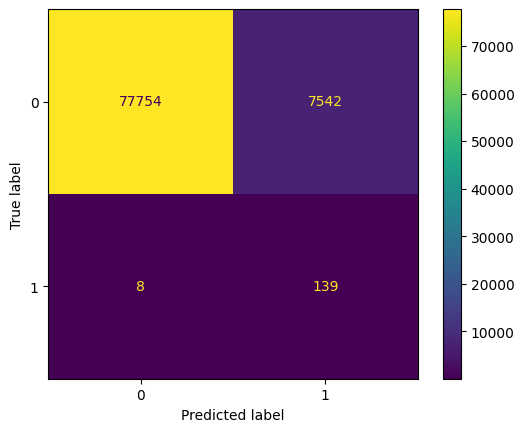

In [36]:
ConfusionMatrixDisplay.from_estimator(lr2, X_test, y_test)

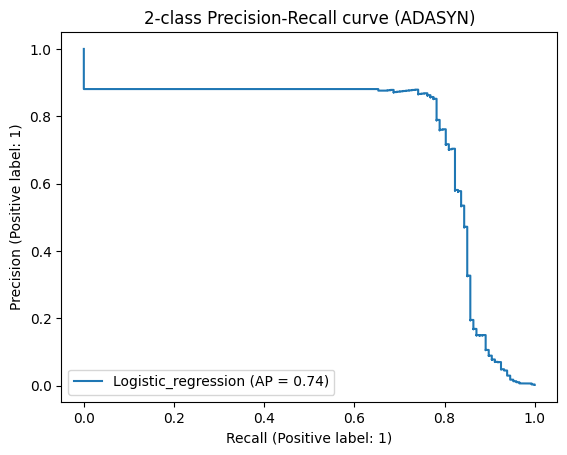

In [37]:
display = PrecisionRecallDisplay.from_estimator(
    lr2, X_test, y_test, name="Logistic_regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (ADASYN)")

In [38]:
y_pred = lr2.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9116369977645916

F1-score:

In [39]:
y_pred = lr2.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9521177722267581

Confusion Matrix for unsampled trained data (logistic regression)

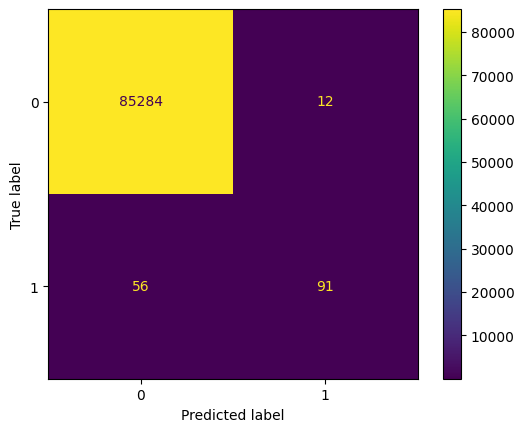

In [51]:
ConfusionMatrixDisplay.from_estimator(lr3, X_test, y_test)

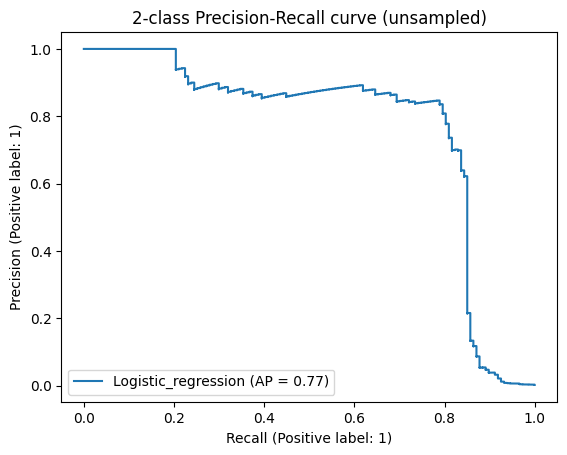

In [53]:
display = PrecisionRecallDisplay.from_estimator(
    lr3, X_test, y_test, name="Logistic_regression"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (unsampled)")

In [54]:
y_pred = lr3.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.999204147794436

Confusion matrix for smote trained data: (decision Tree)

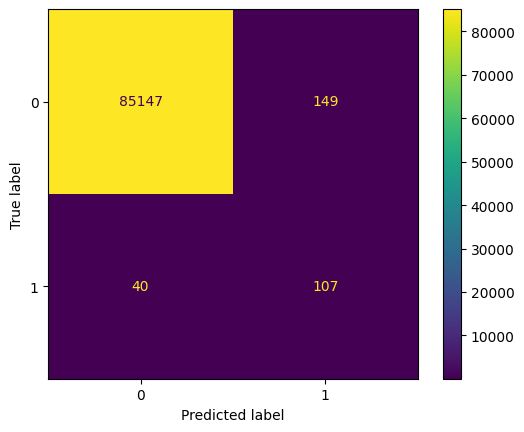

In [40]:
ConfusionMatrixDisplay.from_estimator(decision_model_smote, X_test, y_test)

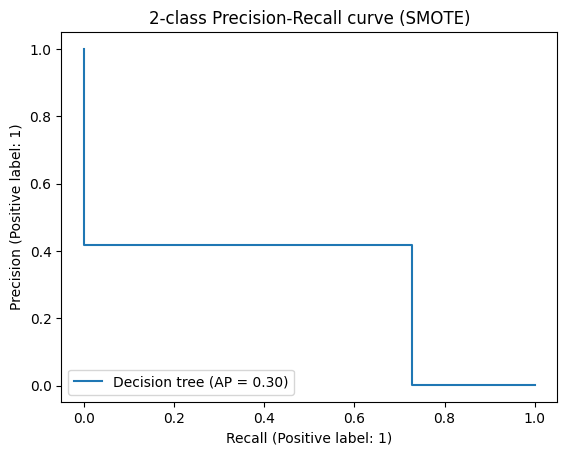

In [41]:
display = PrecisionRecallDisplay.from_estimator(
    decision_model_smote, X_test, y_test, name="Decision tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (SMOTE)")

F1 Score

In [42]:
y_pred = decision_model_smote.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9977879990168884

In [43]:
y_pred = decision_model_smote.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9980864334566426

Confusion matrix for ADASYN trained data: (decision Tree)

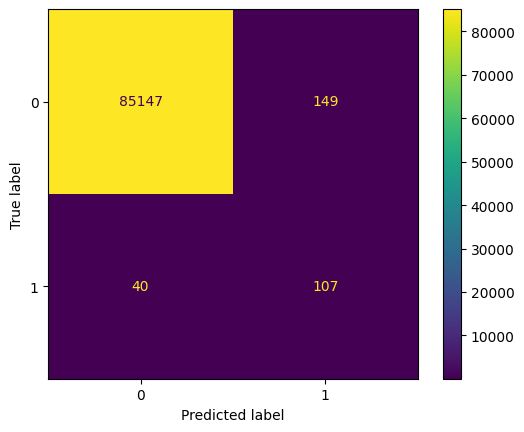

In [44]:
ConfusionMatrixDisplay.from_estimator(decision_model_adasyn, X_test, y_test)

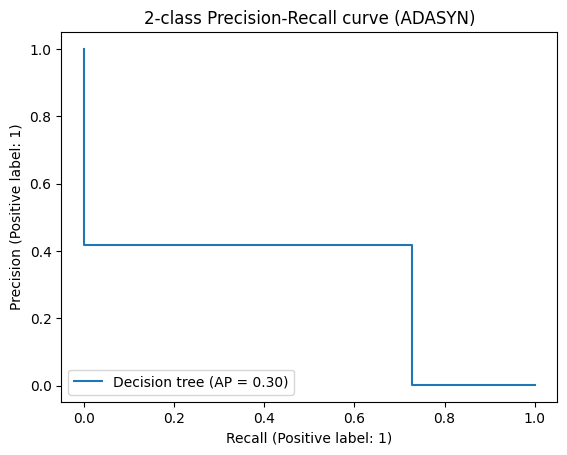

In [45]:
display = PrecisionRecallDisplay.from_estimator(
    decision_model_adasyn, X_test, y_test, name="Decision tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (ADASYN)")

F1 score

In [46]:
y_pred = decision_model_adasyn.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9977879990168884

In [47]:
y_pred = decision_model_adasyn.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9980864334566426

Confusion matrix for unsampled trained data: (decision Tree)

y_pred_unsample_dt

Plotting the data before resampling

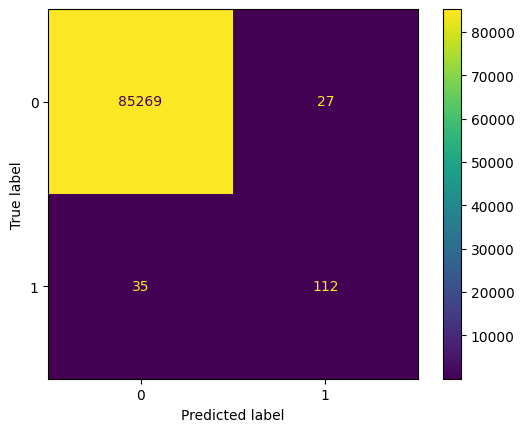

In [57]:
ConfusionMatrixDisplay.from_estimator(decision_model_unsampled, X_test, y_test)

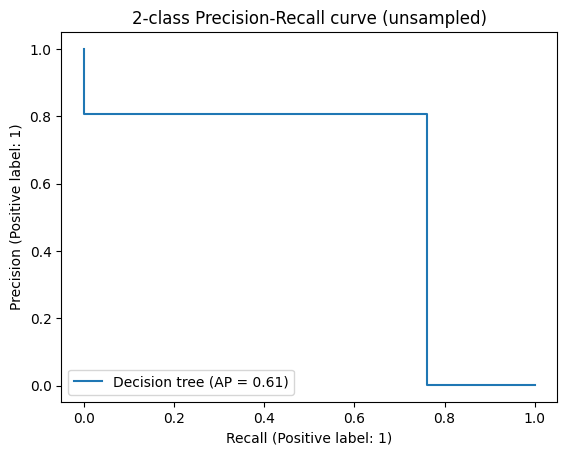

In [58]:
display = PrecisionRecallDisplay.from_estimator(
    decision_model_unsampled, X_test, y_test, name="Decision tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve (unsampled)")

In [59]:
y_pred = decision_model_unsampled.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.9992743700478681